In [1]:
import numpy as np
import cv2 
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.

Bad key text.latex.unicode in file C:\Users\Shivam Shandilya\anaconda3\envs\deepl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Shivam Shandilya\anaconda3\envs\deepl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Shivam Shandilya\anaconda3\envs\deepl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False'

In [2]:
seed=7
np.random.seed(seed)

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28,1).astype('float32')

In [6]:
X_train =X_train/255
X_test =X_test/255

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

# MODEL

In [8]:
model=Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 496us/sample - loss: 0.3712 - accuracy: 0.8853 - val_loss: 0.0768 - val_accuracy: 0.9744
Epoch 2/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.0928 - accuracy: 0.9712 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 3/10
60000/60000 [==============================] - 30s 498us/sample - loss: 0.0673 - accuracy: 0.9785 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 4/10
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0382 - val_accuracy: 0.9865
Epoch 5/10
60000/60000 [==============================] - 31s 516us/sample - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0311 - val_accuracy: 0.9891
Epoch 6/10
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0318 - val_accuracy: 0.9892
Epoch 7/10
60000/60000 [====================

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


Large CNN Error: 0.97%


In [14]:
scores

[0.02841670204218244, 0.9903]

Prediction of model: 2
Actual class:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


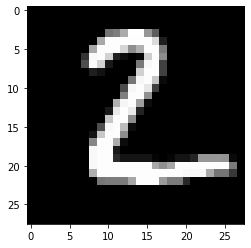

In [21]:
image = (X_test[1]).reshape(1,28,28,1) 
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))
print('Actual class:{}'.format(y_test[1]))
plt.imshow(image.reshape(28,28,1),cmap='gray')

Test images shape: (4, 28, 28, 1)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


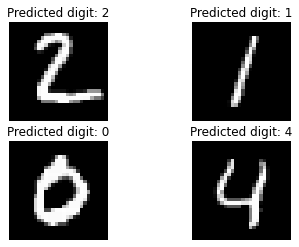

In [19]:
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))


In [22]:
model_json = model.to_json()


In [23]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)



In [24]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
with open("shi.txt","w") as file:
    file.write("biatch")